# Asimov significance

Using `v4_sig` templates which only has MCstats unc. and the top+wjets rate constraints.

Note: all significance values are after combination with the topCR and the wjetsCR).

In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'had': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [4]:
def get_lumi(years, channels):
    lum_ = 0
    for year in years:
        lum = 0
        for ch in channels:
            lum += luminosity[ch][year] / 1000.0

        lum_ += lum / len(channels)    
    return lum_

In [47]:
! ls ../combine/templates/v4_sig/

config_make_templates_sig.yaml hists_templates_Run2.pkl
create_datacard_sig.py


In [58]:
# get lumi
import pickle as pkl
with open("../combine/templates/v4_sig/hists_templates_Run2.pkl", "rb") as f:    
    h = pkl.load(f)

In [59]:
h

Hist(
  StrCategory(['VBF', 'WJetsLNu', 'EWKvjets', 'WH', 'TTbar', 'SingleTop', 'ggF', 'DYJets', 'Data', 'Diboson', 'WZQQ', 'ttH', 'ZH', 'Fake'], growth=True, name='Sample'),
  StrCategory(['nominal'], growth=True, name='Systematic'),
  StrCategory(['WJetsCR', 'TopCR', 'ParT9999', 'ParT9995', 'ParT999', 'ParT995', 'ParT99', 'ParT985', 'ParT98', 'ParT975', 'ParT97', 'ParT965', 'ParT96', 'ParT955', 'ParT95', 'ParT945', 'ParT94', 'THWW99', 'THWW985', 'THWW98', 'THWW975', 'THWW97', 'THWW965', 'THWW96', 'THWW955', 'THWW95', 'THWW945', 'THWW94', 'THWW935', 'THWW93', 'THWW925', 'THWW92', 'THWW915', 'THWW91', 'THWW905', 'THWW90', 'ggF95', 'ggF945', 'ggF94', 'ggF935', 'ggF93', 'ggF925', 'ggF92', 'ggF915', 'ggF91', 'ggF905', 'ggF90', 'ggF895', 'ggF89', 'ggF885', 'ggF88', 'VBF92', 'VBF915', 'VBF91', 'VBF905', 'VBF90', 'VBF895', 'VBF89', 'ggF95pt250to300', 'ggF95pt300to450', 'ggF95pt450toInf', 'ggF945pt250to300', 'ggF945pt300to450', 'ggF945pt450toInf', 'ggF94pt250to300', 'ggF94pt300to450', 'ggF94p

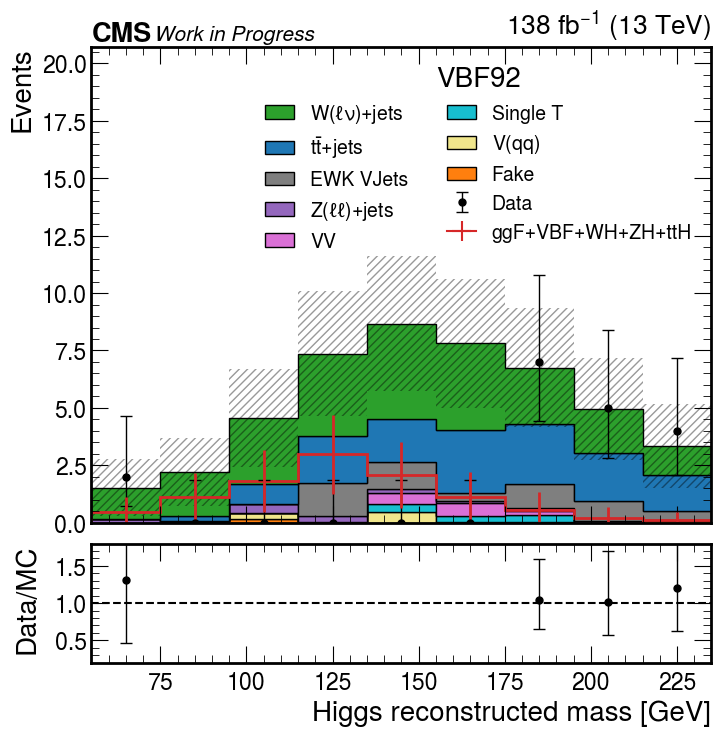

In [61]:
plt.rcParams.update({"font.size": 20})

region = "VBF92"
text = region

blind_region=[90,160]
mult = 1

if "CR" in region:
    blind_region = False
    mult=1

years = ["2018", "2017", "2016", "2016APV"]
channels = ["ele", "mu"]

from utilsCombine import plot_hists
from utilsCombine2 import plot_hists

plot_hists(h[{"Systematic": "nominal", "Region": region}], years, channels,
            add_data=True,
            logy=False,
            add_soverb=True,
            only_sig=False,
            mult=mult,
            outpath=f"/Users/fmokhtar/Desktop/AN_2024/combine/",
           save_as=region,
           text_=text,
           blind_region=blind_region,
          )

# ParT vs Part-Finetuned

In [12]:
##### they are combined with the topCR and the wjetsCR

tagger_cuts_ParT = [
    0.96,
    0.965,    
    0.97,
    0.975,
    0.98,
    0.985,
    0.99,
    0.995,
    0.999,
    0.9995,
    0.9999,    
]
sig_ParT = [
    0.649891,   # 0.96
    0.655819,   # 0.965    
    0.675817,   # 0.97
    0.688667,   # 0.975    
    0.701215,   # 0.98
    0.731005,   # 0.985
    0.769298,   # 0.99
    0.863559,   # 0.995
    1.02097,   # 0.999
    0.944322,   # 0.9995
    0.68858,   # 0.9999
]

tagger_cuts_ParT_finetuned = [
    0.90,
    0.905,
    0.91,
    0.915,
    0.92,
    0.925,
    0.93,
    0.935,
    0.94,
    0.945,    
    0.95,
    0.955,
    0.96,
    0.965,
    0.97,
]
sig_ParT_finetuned = [
    1.73909,   # 0.90
    1.77402,   # 0.905
    1.80721,   # 0.91
    1.8226,   # 0.915
    1.84737, # 0.92
    1.85514, # 0.925
    1.86402,   # 0.93
    1.86153,   # 0.935
    1.86276,   # 0.94
    1.83773,   # 0.945    
    1.79429,   # 0.95
    1.72328,   # 0.955
    1.68834,   # 0.96
    1.57049,   # 0.965    
    1.48353,   # 0.97
]

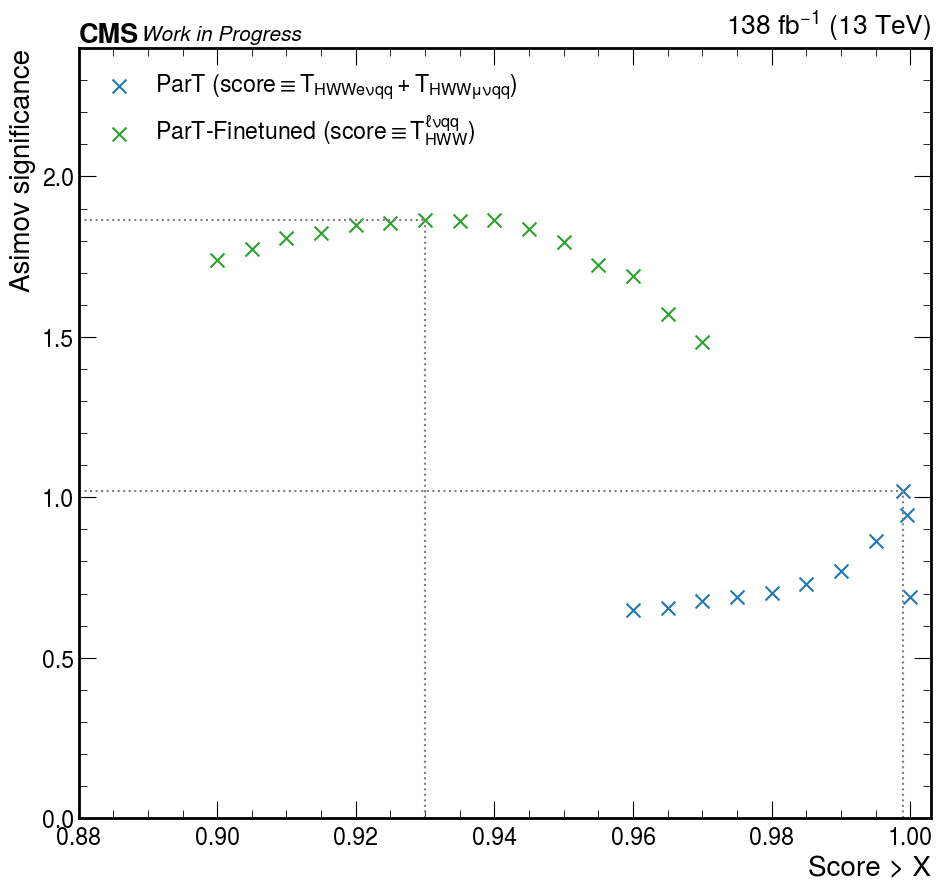

In [19]:
color_dict = {    
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:green",   
}

lab_dict = {    
    "fj_ParT_score": r"ParT ($score \equiv T_{HWW e \nu q q} +T_{HWW \mu \nu q q}$)",
    "fj_ParT_score_finetuned": r"ParT-Finetuned ($score \equiv T_{HWW}^{\ell\nu qq}$)",
}


plt.rcParams.update({"font.size": 20})


years = ["2018", "2017", "2016APV", "2016"]
channels = ["ele", "mu"]

fig, ax = plt.subplots(figsize=(11, 10))


ax.scatter(tagger_cuts_ParT, sig_ParT, marker="x", s=100, label=lab_dict["fj_ParT_score"], color=color_dict["fj_ParT_score"])    
ax.scatter(tagger_cuts_ParT_finetuned, sig_ParT_finetuned, marker="x", s=100, label=lab_dict["fj_ParT_score_finetuned"], color=color_dict["fj_ParT_score_finetuned"])

# ax.axhline(1.50482, color="grey", linestyle="--")
# ax.axhline(0.882643, color="grey", linestyle="--")

ax.set_ylim(0.3, 1.8)
ax.legend(loc="upper left")
ax.set_ylabel("Asimov significance")
ax.set_xlabel("Score > X")

x1 = 0.88
x2 = 1.003
y1 = 0
y2 = 2.4

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

####### ParT
wp = 0.999
sig = 1.02097
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

####### ParT_finetuned
wp = 0.93
sig = 1.86402
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

hep.cms.lumitext("%.0f " % get_lumi(years, channels) + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN_2024/significance/sig_ParTvsParTFinetuned.pdf")

# Should we categorize?

In [29]:
##### they are combined with the topCR and the wjetsCR

tagger_cuts = [
    0.90,
    0.905,
    0.91,
    0.915,
    0.92,
    0.925,
    0.93,
    0.935,
    0.94,
    0.945,    
    0.95,
    0.955,
    0.96,
    0.965,
    0.97,
]

# with ggF and VBF splitting
sig = [
    1.73909,   # 0.90
    1.77402,   # 0.905
    1.80721,   # 0.91
    1.8226,   # 0.915
    1.84737, # 0.92
    1.85514, # 0.925
    1.86402,   # 0.93
    1.86153,   # 0.935
    1.86276,   # 0.94
    1.83773,   # 0.945    
    1.79429,   # 0.95
    1.72328,   # 0.955
    1.68834,   # 0.96
    1.57049,   # 0.965    
    1.48353,   # 0.97
]

tagger_cuts_ggFandVBF = [
    0.90,
    0.905,
    0.91,
    0.915,
    0.92,
]

# without ggF and VBF splitting
sig_ggFandVBF = [
    2.1344,   # 0.90
    2.18795,   # 0.905
    2.19608,   # 0.91
    2.19806,   # 0.915
    2.19717, # 0.92
]

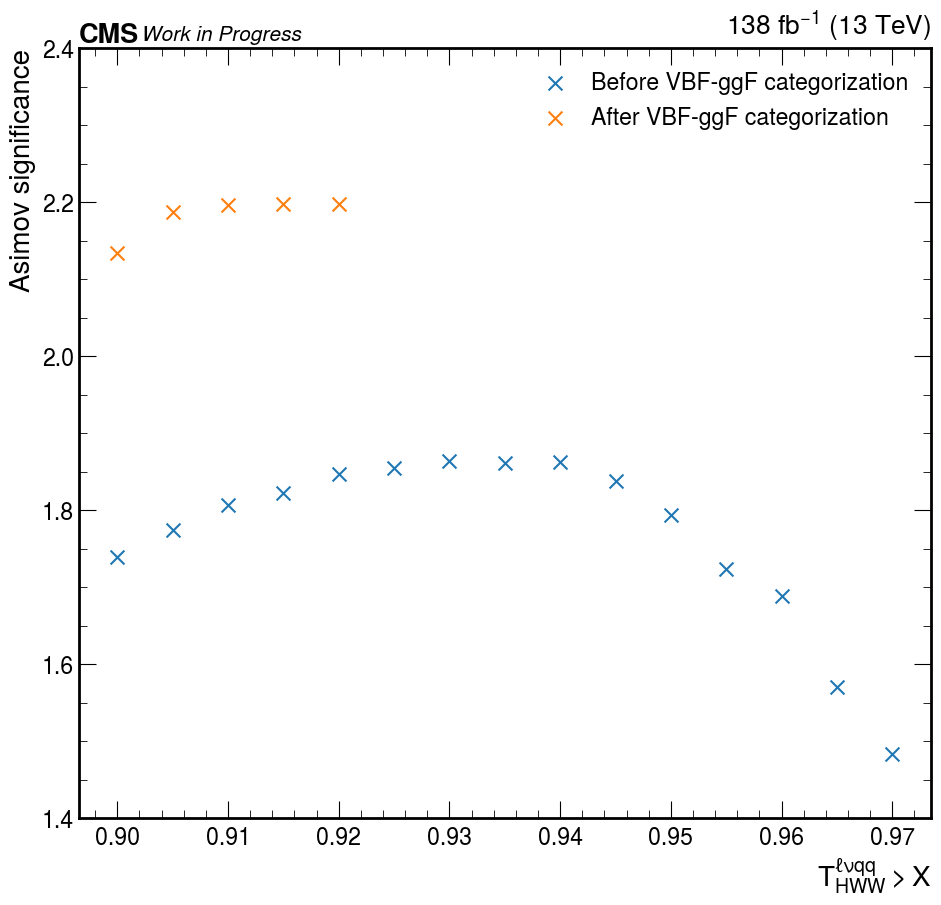

In [30]:
color_dict = {    
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:green",   
}

lab_dict = {    
    "fj_ParT_score": "ParT",
    "fj_ParT_score_finetuned": "ParT-finetuned",
}


plt.rcParams.update({"font.size": 20})

years = ["2018", "2017", "2016APV", "2016"]
channels = ["ele", "mu"]

fig, ax = plt.subplots(figsize=(11, 10))

ax.scatter(tagger_cuts, sig, marker="x", s=100, label="Before VBF-ggF categorization")
ax.scatter(tagger_cuts_ggFandVBF, sig_ggFandVBF, marker="x", s=100, label="After VBF-ggF categorization")

# ax.plot([0.975, 0.975], [0.3, 2.00251], ':', color='grey')
# ax.plot([0.3, 0.975], [2.00251, 2.00251], ':', color='grey')

# ax.plot([0.985, 0.985], [0.3, 1.67914], ':', color='grey')
# ax.plot([0.3, 0.985], [1.67914, 1.67914], ':', color='grey')

# ax.set_xlim(0.956, 0.989)
# ax.set_ylim(0.88, 2.4)

ax.set_ylim(1.4, 2.4)
ax.legend()
ax.set_ylabel("Asimov significance")
ax.set_xlabel(r"$T_{HWW}^{\ell\nu qq} > X$")

# ax.set_xticks(tagger_cuts)

hep.cms.lumitext("%.0f " % get_lumi(years, channels) + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN_2024/significance/significance_VBFggFcategorization.pdf")

# WP1 (ggF and VBF)

In [54]:
##### they are combined with the topCR and the wjetsCR

tagger_cuts_vbf = [
    0.89,
    0.895,    
    0.90,
    0.905,
    0.91,    
    0.915,
    0.92,
]
sig_vbf = [
    1.55446,   # 0.89
    1.58744,   # 0.895    
    1.60331,   # 0.90
    1.64828,   # 0.905
    1.62911,   # 0.91
    1.61998,   # 0.915
    1.5914,   # 0.92 
]

tagger_cuts = [
    0.90,
    0.905,
    0.91,    
    0.915,
    0.92,
    0.925,
    0.93,
    0.935,
    0.94,
    0.945,    
    0.95,
]
   
sig_ggf_pt250to300 = [
    0.900477,   # 0.90
    0.909138,   # 0.905
    0.923631,   # 0.91
    0.920433,   # 0.915
    0.937559,   # 0.92
    0.93367,   # 0.925
    0.917323,   # 0.93
    0.904425,   # 0.935
    0.899021,   # 0.94
    0.867066,   # 0.945
    0.863772,   # 0.95
]
sig_ggf_pt300to450 = [
    1.14589,   # 0.90
    1.1643,   # 0.905
    1.17714,   # 0.91
    1.18273,   # 0.915
    1.19386,   # 0.92
    1.19124,   # 0.925
    1.19514,   # 0.93
    1.20237,   # 0.935
    1.19584,   # 0.94
    1.18315,   # 0.945
    1.14474,   # 0.95
]
sig_ggf_pt450toInf = [
    0.749447,   # 0.90
    0.752318,   # 0.905
    0.766739,   # 0.91
    0.777824,   # 0.915
    0.774589,   # 0.92
    0.783609,   # 0.925
    0.798866,   # 0.93
    0.791734,   # 0.935
    0.805234,   # 0.94
    0.802466,   # 0.945
    0.785969,   # 0.95
]

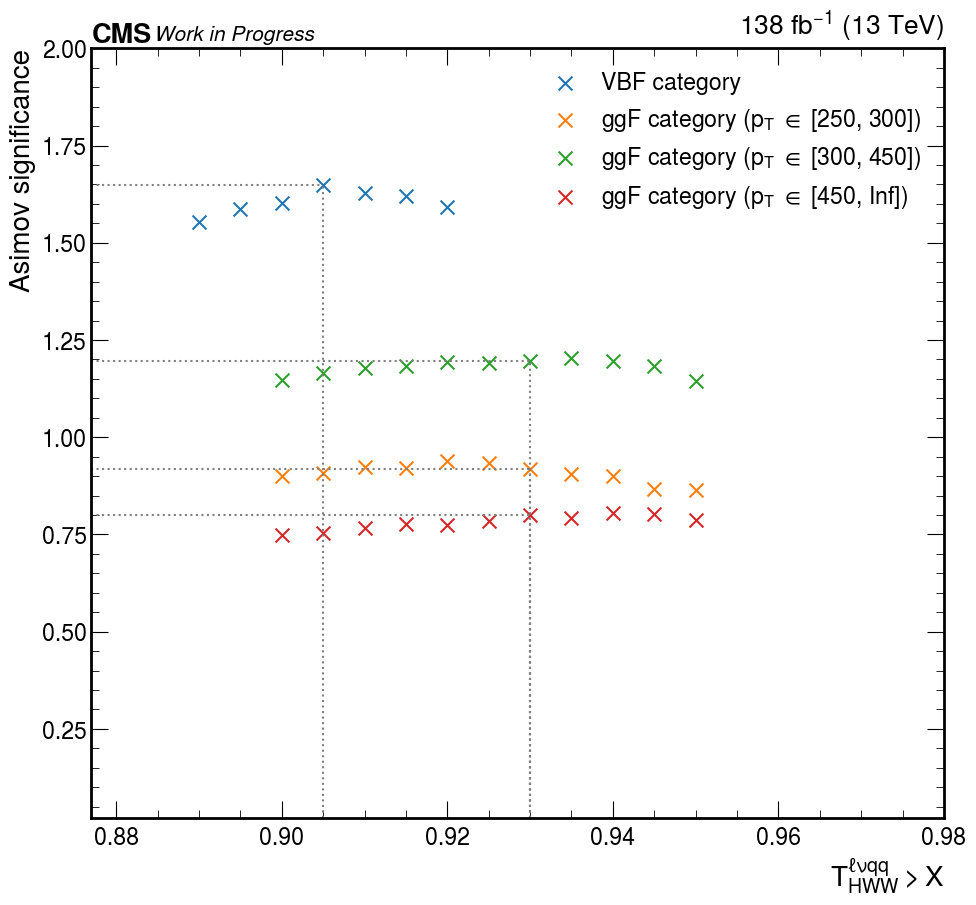

In [65]:
color_dict = {    
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:green",   
}

lab_dict = {    
    "fj_ParT_score": "ParT",
    "fj_ParT_score_finetuned": "ParT-finetuned",
}


plt.rcParams.update({"font.size": 20})

years = ["2018", "2017", "2016APV", "2016"]
channels = ["ele", "mu"]

fig, ax = plt.subplots(figsize=(11, 10))

for tagger in [
#     "fj_ParT_score",
    "fj_ParT_score_finetuned",
]:
    ax.scatter(tagger_cuts_vbf, sig_vbf, marker="x", s=100, label="VBF category")
#     ax.scatter(tagger_cuts, sig_ggf_inclusive, marker="x", s=100, label="ggF category (all inclusive in pT)")
    ax.scatter(tagger_cuts, sig_ggf_pt250to300, marker="x", s=100, label=r"ggF category ($p_T$ $\in$ [250, 300])")
    ax.scatter(tagger_cuts, sig_ggf_pt300to450, marker="x", s=100, label=r"ggF category ($p_T$ $\in$ [300, 450])")
    ax.scatter(tagger_cuts, sig_ggf_pt450toInf, marker="x", s=100, label=r"ggF category ($p_T$ $\in$ [450, Inf])")               

    
x1 = 0.877
y1 = 0.02
ax.set_xlim(x1, 0.98)
ax.set_ylim(y1, 2)

####### VBF
wp = 0.905
sig = 1.64828
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

####### ggFpt250to300
wp = 0.93
sig = 0.917323
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

####### ggFpt300to450
wp = 0.93
sig = 1.19514
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

####### ggFpt450toInf
wp = 0.93
sig = 0.798866
ax.plot([wp, wp], [y1, sig], ':', color='grey')
ax.plot([x1, wp], [sig, sig], ':', color='grey')

ax.legend()
ax.set_ylabel("Asimov significance")
ax.set_xlabel(r"$T_{HWW}^{\ell\nu qq} > X$")

# ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])

# ax.set_xticks(tagger_cuts)


hep.cms.lumitext("%.0f " % get_lumi(years, channels) + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/AN_2024/significance/significanceWP.pdf")